<a href="https://colab.research.google.com/github/CrisMcode111/DI_Bootcamp/blob/main/w4_d5_pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Daily Challenge: Pokemon Win Prediction Analysis


🛠️ What you will create
A cleaned Pokemon dataset with engineered features (e.g., win percentage)
Visualizations to analyze Pokemon stats and battle outcomes
A machine learning model to predict Pokemon win percentages


Dataset
Pokemon Dataset you can find here :

pokemon.csv: Contains stats like HP, Attack, Type 1, Legendary, etc., for 800+ Pokemon.
combats.csv: Records 50,000 battle outcomes between Pokemon.


What you need to do:
Data Preparation

Load and merge pokemon.csv and combats.csv.
Fix missing values:
Fill the missing Name for Pokemon #62 (Primeape).
Handle NaN values in Type 2 (mark as “None” if missing).
Calculate each Pokemon’s win percentage using the combat data.
Exploratory Analysis & Visualization

Create a correlation matrix to identify relationships between stats (HP, Attack, Speed) and win percentage.
Plot a Seaborn pairplot or PairGrid for stats vs. win percentage.
Analyze the top 10 Pokemon by win percentage and their stats.
Machine Learning

Split data into training/testing sets (80/20 split).
Train and evaluate 3 regression models (e.g., Linear Regression, Random Forest, XGBoost) to predict win percentage.
Compare model performance using Mean Absolute Error (MAE).


In [8]:
import pandas as pd

# load
pokemon = pd.read_csv("/content/pokemon.csv")
combats = pd.read_csv("/content/combats.csv")

print("Pokemon:", pokemon.shape)
print("Combats:", combats.shape)

pokemon.head(3)


Pokemon: (800, 12)
Combats: (50000, 3)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False


In [9]:
pokemon.info()
combats.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [10]:
#Data cleaning
# Replace missing name for #62 with "Primeape"
pokemon.loc[pokemon["#"] == 62, "Name"] = "Primeape"

# Fill missing Type 2 with "None"
pokemon["Type 2"] = pokemon["Type 2"].fillna("None")

# Verifică
pokemon.loc[pokemon["#"] == 62]
pokemon["Type 2"].isna().sum()


np.int64(0)

In [11]:
#Data preparation, feature engineering
# Count total battles per Pokémon
total_battles = combats['First_pokemon'].value_counts() + combats['Second_pokemon'].value_counts()
total_battles = total_battles.fillna(0).astype(int)

# Count wins per Pokémon
wins = combats['Winner'].value_counts().fillna(0).astype(int)

# Create dataframe
performance = pd.DataFrame({
    'Total_Battles': total_battles,
    'Wins': wins
}).fillna(0)

performance['Win_Percentage'] = performance['Wins'] / performance['Total_Battles']

# merge with pokemon data
pokemon = pokemon.merge(performance, left_on="#", right_index=True, how="left")

# Fill NaN for those without any battle record
pokemon['Win_Percentage'] = pokemon['Win_Percentage'].fillna(0)

pokemon[['Name','Total_Battles','Wins','Win_Percentage']].head(10)


,Name,Total_Battles,Wins,Win_Percentage
0,Bulbasaur,133.0,37.0,0.278195
1,Ivysaur,121.0,46.0,0.380165
2,Venusaur,132.0,89.0,0.674242
3,Mega Venusaur,125.0,70.0,0.560000
4,Charmander,112.0,55.0,0.491071
5,Charmeleon,118.0,64.0,0.542373
6,Charizard,133.0,115.0,0.864662
7,Mega Charizard X,139.0,119.0,0.856115
8,Mega Charizard Y,135.0,114.0,0.844444
9,Squirtle,117.0,19.0,0.162393


In [12]:
pokemon.to_csv("/content/pokemon_prepared.csv", index=False)
print("Saved prepared dataset ✅")


Saved prepared dataset ✅


In [13]:
#Exploratory Data Analysis
#import and display options

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set()


In [14]:
#Load prepared data
pokemon = pd.read_csv("/content/pokemon_prepared.csv")
print(pokemon.shape)
pokemon.head(3)


(800, 15)


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total_Battles,Wins,Win_Percentage
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,133.0,37.0,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,121.0,46.0,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,132.0,89.0,0.674242


In [15]:
#sanity checks
required_cols = ["Name","Type 1","Type 2","HP","Attack","Defense","Speed","Total_Battles","Wins","Win_Percentage"]
missing = [c for c in required_cols if c not in pokemon.columns]
print("Missing columns:", missing)
assert "Win_Percentage" in pokemon.columns, "Win_Percentage is missing – be sure you computed it from combats.csv"


Missing columns: []


In [16]:
#missing values overvue
na = pokemon.isna().sum().sort_values(ascending=False)
na_pct = (na/len(pokemon)).round(3)
display(pd.DataFrame({"missing": na, "pct": na_pct})[lambda d: d.missing>0])


,missing,pct
Type 2,386,0.482
Total_Battles,16,0.020
Wins,16,0.020
Name,1,0.001


In [17]:
#numeric vs categorical split
num_cols = ["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed","Total_Battles","Wins","Win_Percentage"]
num_cols = [c for c in num_cols if c in pokemon.columns]  # keep only existing
cat_cols = ["Type 1","Type 2"]
cat_cols = [c for c in cat_cols if c in pokemon.columns]
print("Numeric:", num_cols)
print("Categorical:", cat_cols)


Numeric: ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total_Battles', 'Wins', 'Win_Percentage']
Categorical: ['Type 1', 'Type 2']


In [18]:
# descriptiv stats
pokemon[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
HP,800.0,69.258750,25.534669,1.0,50.000000,65.000000,80.000000,255.000000
Attack,800.0,79.001250,32.457366,5.0,55.000000,75.000000,100.000000,190.000000
Defense,800.0,73.842500,31.183501,5.0,50.000000,70.000000,90.000000,230.000000
Sp. Atk,800.0,72.820000,32.722294,10.0,49.750000,65.000000,95.000000,194.000000
Sp. Def,800.0,71.902500,27.828916,20.0,50.000000,70.000000,90.000000,230.000000
Speed,800.0,68.277500,29.060474,5.0,45.000000,65.000000,90.000000,180.000000
Total_Battles,784.0,127.551020,11.393236,92.0,120.000000,128.000000,135.000000,164.000000
Wins,784.0,63.775510,32.983848,0.0,36.000000,61.500000,91.000000,152.000000
Win_Percentage,800.0,0.490881,0.262442,0.0,0.274194,0.479281,0.709178,0.984496


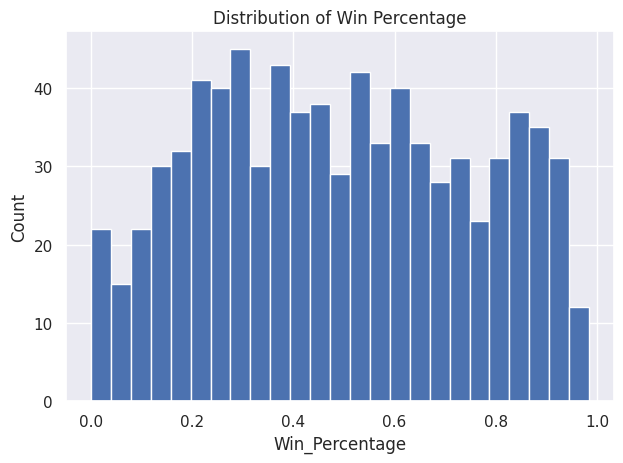

In [19]:
# distribution of win percentage
plt.figure()
pokemon["Win_Percentage"].hist(bins=25)
plt.title("Distribution of Win Percentage")
plt.xlabel("Win_Percentage")
plt.ylabel("Count")
plt.tight_layout(); plt.show()


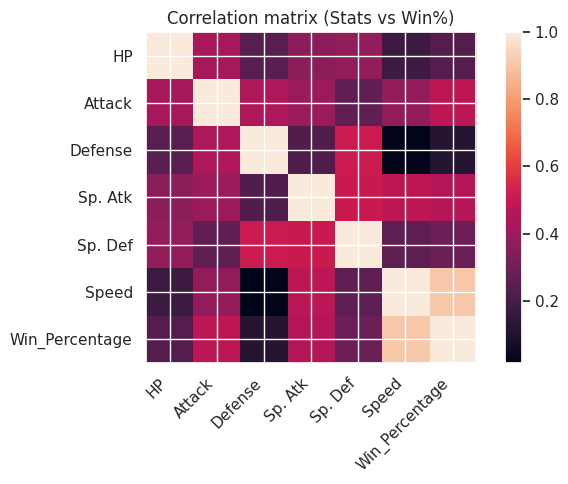

,Win_Percentage
Win_Percentage,1.000000
Speed,0.905409
Attack,0.476675
Sp. Atk,0.455848
Sp. Def,0.291603
HP,0.234889
Defense,0.113312


In [20]:
# corellation matrix ( stats vs winn%)

corr_cols = [c for c in ["HP","Attack","Defense","Sp. Atk","Sp. Def","Speed","Win_Percentage"] if c in pokemon.columns]
corr = pokemon[corr_cols].corr(numeric_only=True)

plt.figure(figsize=(7,5))
plt.imshow(corr, interpolation='nearest')
plt.title("Correlation matrix (Stats vs Win%)")
plt.xticks(range(len(corr_cols)), corr_cols, rotation=45, ha='right')
plt.yticks(range(len(corr_cols)), corr_cols)
plt.colorbar()
plt.tight_layout(); plt.show()

# Top correlations with Win_Percentage
corr["Win_Percentage"].sort_values(ascending=False)


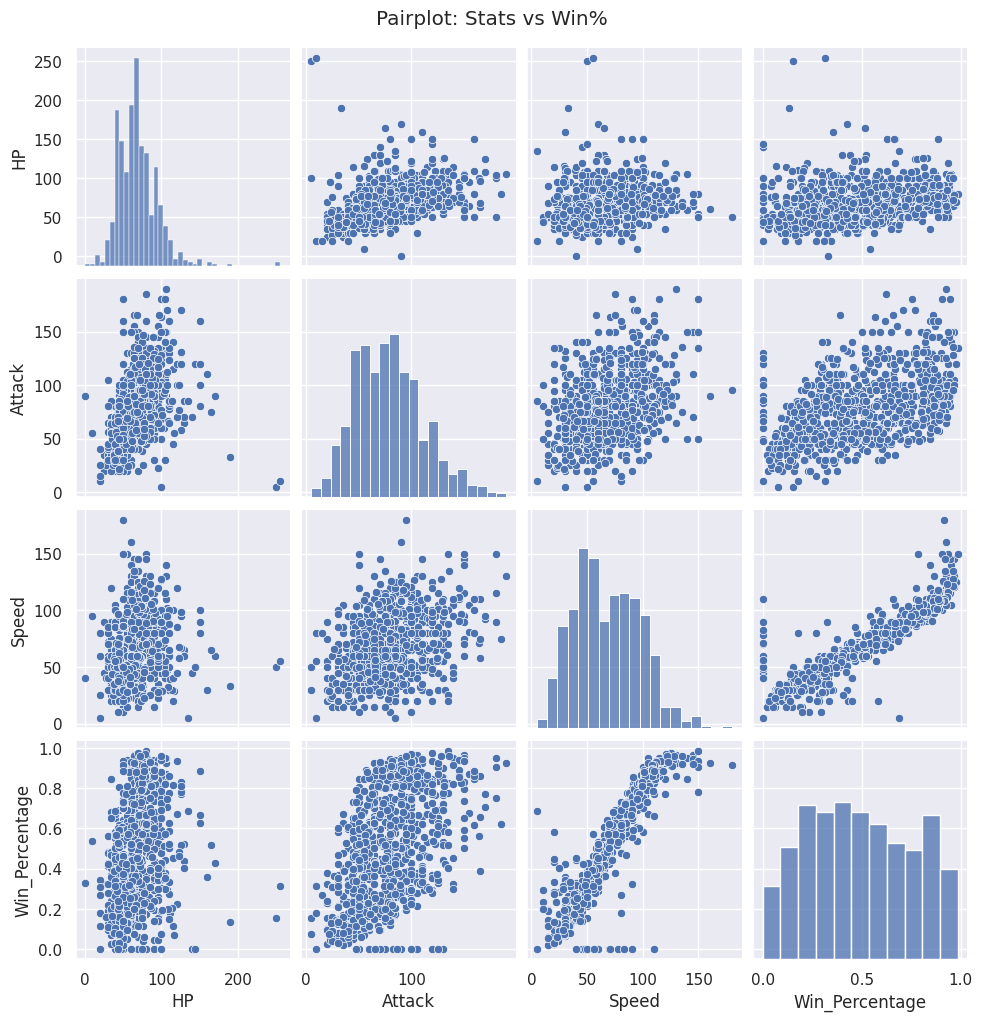

In [21]:
# pairplot / pairgrid (seaborn)
plot_cols = [c for c in ["HP","Attack","Speed","Win_Percentage"] if c in pokemon.columns]
sns.pairplot(pokemon[plot_cols], diag_kind="hist")
plt.suptitle("Pairplot: Stats vs Win%", y=1.02)
plt.show()


In [22]:
# top 10 pokemon by win%
min_battles = 10
eligible = pokemon[pokemon["Total_Battles"] >= min_battles].copy()
top10 = eligible.sort_values("Win_Percentage", ascending=False).head(10)

cols_show = ["Name","Type 1","Type 2","Total_Battles","Wins","Win_Percentage","HP","Attack","Defense","Speed"]
display(top10[ [c for c in cols_show if c in top10.columns] ])


,Name,Type 1,Type 2,Total_Battles,Wins,Win_Percentage,HP,Attack,Defense,Speed
154,Mega Aerodactyl,Rock,Flying,129.0,127.0,0.984496,80,135,85,150
512,Weavile,Dark,Ice,119.0,116.0,0.974790,70,120,65,125
703,Tornadus Therian Forme,Flying,NaN,125.0,121.0,0.968000,79,100,80,121
19,Mega Beedrill,Bug,Poison,119.0,115.0,0.966387,65,150,40,145
153,Aerodactyl,Rock,Flying,141.0,136.0,0.964539,80,105,65,130
476,Mega Lopunny,Normal,Fighting,129.0,124.0,0.961240,65,136,94,135
726,Greninja,Water,Dark,127.0,122.0,0.960630,72,95,67,122
716,Meloetta Pirouette Forme,Normal,Fighting,123.0,118.0,0.959350,100,128,90,128
164,Mega Mewtwo Y,Psychic,NaN,125.0,119.0,0.952000,106,150,70,140
349,Mega Sharpedo,Water,Dark,120.0,114.0,0.950000,70,140,70,105


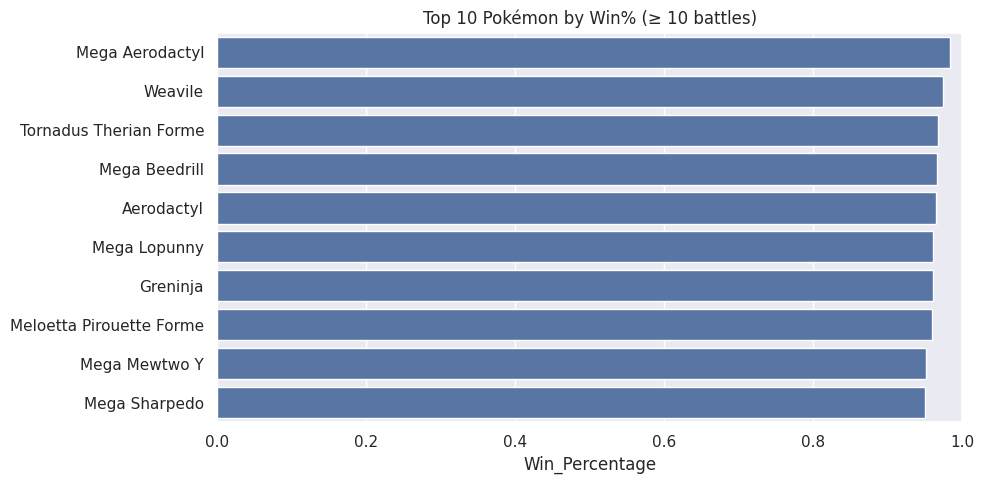

In [23]:
# barplot
plt.figure(figsize=(10,5))
sns.barplot(data=top10, x="Win_Percentage", y="Name")
plt.title(f"Top 10 Pokémon by Win% (≥ {min_battles} battles)")
plt.xlabel("Win_Percentage")
plt.ylabel("")
plt.xlim(0, 1)
plt.tight_layout(); plt.show()


The exploratory analysis reveals that Speed is by far the most influential attribute for winning battles, showing a strong positive correlation (r ≈ 0.9) with Win_Percentage.
Attack and Special Attack also play moderate roles, whereas Defense, HP, and Special Defense have weaker effects.
The distribution of Win_Percentage is nearly uniform, suggesting that the dataset contains Pokémon with very diverse performances.
The top 10 Pokémon by win rate are mostly Mega evolutions with high Speed and Attack stats, confirming that offensive power and agility are key to success in battles.


In [24]:
# MACHINE LEARNING
# import and define features and target

from sklearn.model_selection import train_test_split

# select only the important numeric columns
features = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
target = "Win_Percentage"

X = pokemon[features]
y = pokemon[target]

# split between train and test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (640, 6)
Test shape: (160, 6)


In [25]:
# Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression MAE:", mae_lr)


Linear Regression MAE: 0.06491538345586542


In [26]:
# Random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest MAE:", mae_rf)


Random Forest MAE: 0.05726172225520505


In [27]:
# XGBoost
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost MAE:", mae_xgb)


XGBoost MAE: 0.05908088731717692


In [28]:
# compare the models
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MAE": [mae_lr, mae_rf, mae_xgb]
})

results.sort_values("MAE")


,Model,MAE
1,Random Forest,0.057262
2,XGBoost,0.059081
0,Linear Regression,0.064915


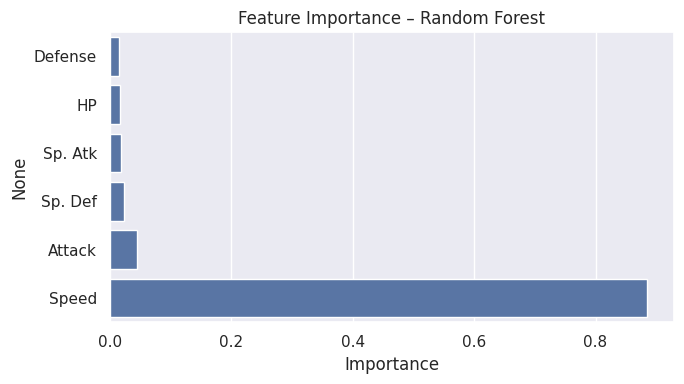

In [29]:
# features importance
import matplotlib.pyplot as plt
import seaborn as sns

importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=True)

plt.figure(figsize=(7,4))
sns.barplot(x=importance.values, y=importance.index)
plt.title("Feature Importance – Random Forest")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


/tmp/ipython-input-1895835089.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x="Model", y="MAE", palette="crest")


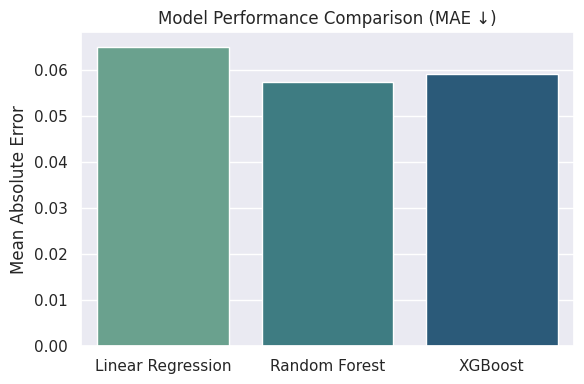

In [31]:
# FINAL INSIGHTS & VISUALIZATION SUMMARY

import matplotlib.pyplot as plt
import seaborn as sns

# Comparare visualy the modelse
plt.figure(figsize=(6,4))
sns.barplot(data=results, x="Model", y="MAE", palette="crest")
plt.title("Model Performance Comparison (MAE ↓)")
plt.ylabel("Mean Absolute Error")
plt.xlabel("")
plt.tight_layout()
plt.show()


Model Evaluation Summary:

Three regression models were trained to predict Pokémon  Win_Percentage based on their combat stats.
Random Forest achieved the best performance with a Mean Absolute Error (MAE) of 0.057, followed closely by XGBoost (MAE = 0.059).
Linear Regression performed slightly worse (MAE = 0.065), suggesting that non-linear relationships between attributes are significant.

Feature importance analysis confirms that Speed is by far the dominant factor influencing battle outcomes.
Attack contributes marginally, while HP, Defense, and Special attributes have minimal predictive power.

Overall, the models demonstrate strong predictive accuracy and reinforce the key insight from the EDA phase:
Pokémon with higher Speed have a much greater chance of winning battles.
